In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest

In [29]:
#Importing the dataset

In [30]:
dataset = pd.read_excel('divorce1.xlsx')

__View the Dataset__

In [31]:
dataset.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,DIVOICER_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [33]:
dataset.shape

(170, 55)

In [34]:
df=pd.DataFrame(dataset)
df.describe() #Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,DIVOICER_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [35]:
# Percentage & Number of divorced participants(class 1) vs married couples(class 0)

df['DIVOICER_Y_N'].value_counts() , df['DIVOICER_Y_N'].value_counts(normalize = True)

(0    86
 1    84
 Name: DIVOICER_Y_N, dtype: int64,
 0    0.505882
 1    0.494118
 Name: DIVOICER_Y_N, dtype: float64)

In [39]:
x = dataset.iloc[:, 0:54].values  #retrieve a particular value belonging to a row and column using the index values assigned
y = dataset.iloc[:,54].values

In [45]:
# define feature selection
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k=15) # k allows a user to select any number of features for training
# apply feature selection
X_selected = fs.fit_transform(x, y)
print(X_selected.shape)

(170, 15)


In [53]:
#df1=pd.DataFrame(X_selected)
#df1.describe()

In [ ]:
#df1.head()

__Splitting the dataset into the Training set & Test Set__

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_selected,y,test_size = 0.2,random_state = 0)

__To see the proportion of Training & Test data__

In [48]:
X_train.shape

(136, 15)

In [49]:
X_test.shape

(34, 15)

__Training the Random Forest Classification model on the Training Set__


In [50]:
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset 
# and uses averaging to improve the predictive accuracy and control over-fitting.

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)

# n_estimators =100: default value of no of trees in the forest.
# Criterion = Gini, entropy, log_loss: To measure the quality of the split.
# Random_state: Controls both the randomness of the bootstrapping(creation of n subsets of equal sizes through random selection with replacement) of the samples used when building trees 

In [54]:
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [55]:
#Predicting a new result - Pick any data and predict if 1 or 0--if you pass x-value, the model gives you y-value

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
# y_pred: Estimated targets as returned by a classifier.
# y_test: Ground truth (correct) target values

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]]


In [59]:
#Create the Confusion Matrix to know the accuracy

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)

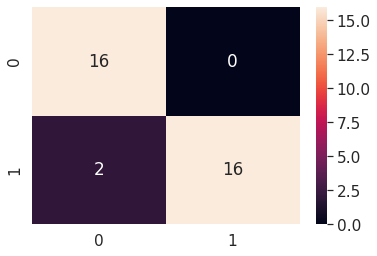

In [61]:
import seaborn as sn
sn.set(font_scale = 1.4)
sn.heatmap(df_cm,annot = True)
plt.show()

In [62]:
from sklearn import metrics
print('Accuracy:',round(metrics.accuracy_score(y_test,y_pred),2))#out of 25%(100) taken for testing,94 out of 100(94%) were predicted correctly

Accuracy: 0.94


__Visualizing the Trees__

In [63]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=None, random_state=42)

In [64]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

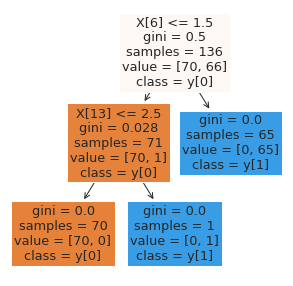

In [65]:
plt.figure(figsize=(5,5));
image=tree.plot_tree(classifier,feature_names=None, class_names=True,filled=True, label='all');
plt.savefig("decistion_tree.jpg",dpi=30);
plt.show()

__On the Train Subset__

In [66]:
classifier.fit(X_test,y_test)

DecisionTreeClassifier(random_state=42)

In [67]:
y_pred1 = classifier.predict(X_train)

In [68]:
print(np.concatenate((y_pred1.reshape(len(y_pred1),1),y_train.reshape(len(y_train),1)),1))

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]]


In [69]:
cm1 = confusion_matrix(y_train,y_pred1)

In [70]:
df_cm1 = pd.DataFrame(cm1)

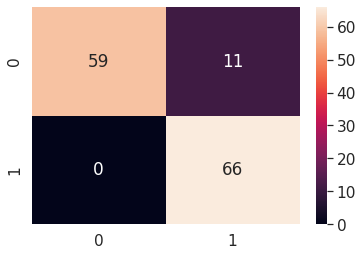

In [71]:
import seaborn as sn
sn.set(font_scale = 1.4)
sn.heatmap(df_cm1,annot = True)
plt.show()

In [72]:
from sklearn import metrics
print('Accuracy:',round(metrics.accuracy_score(y_train,y_pred1),2))

Accuracy: 0.92


__Visualizing the Tree__

In [73]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=None, random_state=42)

In [74]:
classifier.fit(X_test,y_test)

DecisionTreeClassifier(random_state=42)

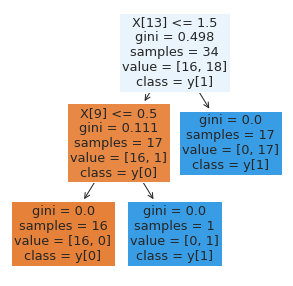

In [75]:
plt.figure(figsize=(5,5));
image=tree.plot_tree(classifier,feature_names=None, class_names=True,filled=True, label='all');
plt.savefig("decistion_tree.jpg",dpi=30);
plt.show()